In [1]:
#Loading and Exploring Data

import pandas as pd

# Load the datasets
train_data_path = 'drugsComTrain_raw.csv'
test_data_path = 'drugsComTest_raw.csv'

# Reading the data
train_data = pd.read_csv(train_data_path, sep=',')
test_data = pd.read_csv(test_data_path, sep=',')

# Displaying the first few rows of the training data to understand its structure
train_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [2]:
# Preprocessing the Data

import pandas as pd
import numpy as np
import re

# Step 1: Handling Missing Values
# Check for missing values in crucial columns
missing_values = train_data[['drugName', 'condition', 'review']].isnull().sum()
print("Missing values before handling:\n", missing_values)

# Drop rows where 'drugName', 'condition', or 'review' is missing
train_data.dropna(subset=['drugName', 'condition', 'review'], inplace=True)

# Re-check for missing values
missing_values_after = train_data[['drugName', 'condition', 'review']].isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)

# Step 2: Text Normalization
# Function to clean and normalize text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply the cleaning function to the review column
train_data['review'] = train_data['review'].apply(clean_text)

# Display the first few rows to verify changes
print("\nFirst few rows after text normalization:\n", train_data.head())

# Step 3: Handling Imbalanced Data
# Check the distribution of the 'rating' column
rating_distribution = train_data['rating'].value_counts(normalize=True)
print("\nRating Distribution:\n", rating_distribution)

train_data.head()


Missing values before handling:
 drugName       0
condition    899
review         0
dtype: int64

Missing values after handling:
 drugName     0
condition    0
review       0
dtype: int64

First few rows after text normalization:
    uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  it has no side effect i take it in combination...       9  20-May-12   
1  my son is halfway through his fourth week of i...       8  27-Apr-10   
2  i used to take another oral contraceptive whic...       5  14-Dec-09   
3  this is my first time using any form of

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,it has no side effect i take it in combination...,9,20-May-12,27
1,95260,Guanfacine,ADHD,my son is halfway through his fourth week of i...,8,27-Apr-10,192
2,92703,Lybrel,Birth Control,i used to take another oral contraceptive whic...,5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,this is my first time using any form of birth ...,8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone has completely turned my life around ...,9,27-Nov-16,37


In [4]:
# Further Preprocessing: 
# Removing Stopwords: remove common words that might not add much meaning to the reviews.
# Lemmatization: reduce words to their base or root form.

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
# Download punkt used by NLTK for dividing strings into lists of words and punctuation marks (tokenization). 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initialize the lemmatizer and stop words list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to string, lowercase, tokenize
    text = str(text).lower()
    tokens = word_tokenize(text) # The word_tokenize function relies on punkt model to split text into individual tokens.
    # Remove stopwords and lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to each review in the dataset
train_data['review'] = train_data['review'].apply(preprocess_text)

# Display the first few rows after preprocessing
train_data.head()


[nltk_data] Downloading package stopwords to /home/ayusee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ayusee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/ayusee/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9,20-May-12,27
1,95260,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8,27-Apr-10,192
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,first time using form birth control glad went ...,8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,27-Nov-16,37


In [5]:
# Feature Engineering: Convert the text data into a matrix of Term Frequency-Inverse Document Frequency (TF-IDF) features.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency

# Fit and transform the 'review' column
X_tfidf = tfidf.fit_transform(train_data['review'])

# Prepare the target variable
y = train_data['rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Print the shape of the datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (128318, 5000)
Testing set shape: (32080, 5000)


Most Common Words: [('day', 95111), ('month', 68193), ('year', 65272), ('week', 57399), ('effect', 54681), ('side', 52657), ('taking', 50927), ('time', 50315), ('pain', 47500), ('take', 46784), ('first', 44646), ('get', 43416), ('started', 42006), ('like', 41291), ('pill', 41067), ('period', 39592), ('work', 38049), ('feel', 37616), ('would', 33077), ('medication', 31503), ('one', 31342), ('back', 31072), ('doctor', 30810), ('also', 28001), ('took', 27899), ('weight', 27222), ('got', 27180), ('medicine', 25281), ('since', 25247), ('life', 25073)]


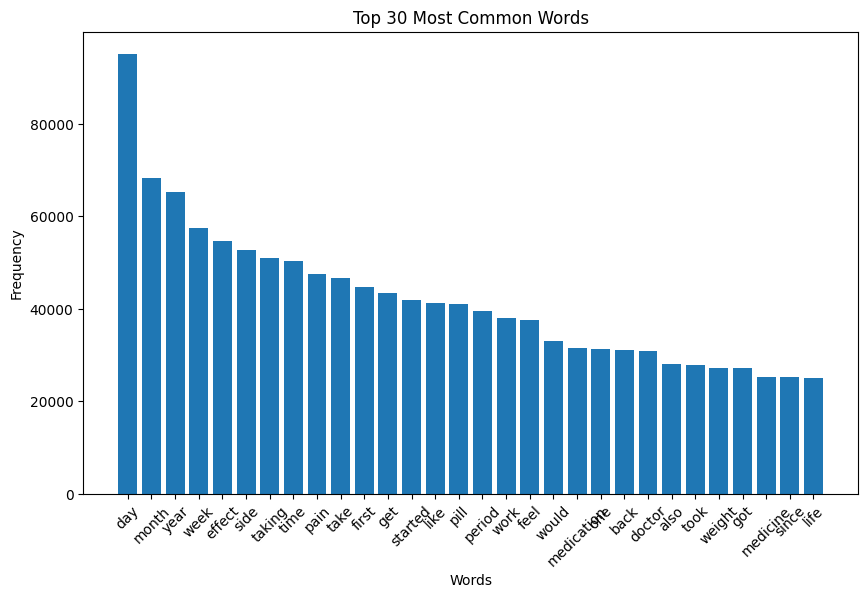

In [6]:
# Exploratory Analysis: Word Frequency

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Combining text for exploratory analysis
all_text = ' '.join(train_data[['review']].agg(' '.join, axis=1))
word_counts = Counter(all_text.split())
most_common_words = word_counts.most_common(30)
print("Most Common Words:", most_common_words)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 30 Most Common Words')
plt.show()


In [8]:
# Advanced Text Feature Extraction

from sklearn.pipeline import Pipeline
from scipy.sparse import hstack

# TF-IDF Vectorization for text features
text_feature = 'review'  # Assuming 'review' is your text column
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(train_data[text_feature])

# Handling categorical variables
categorical_features = ['drugName', 'condition']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine categorical preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying the ColumnTransformer to categorical data
X_categorical = preprocessor.fit_transform(train_data[categorical_features])

# Combine TF-IDF and categorical features
X_combined = hstack([X_text, X_categorical])

# Preparing the target variable
y = train_data['rating']

# Handling Imbalanced Data
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_combined, y)
print('Resampled dataset shape:', Counter(y_res))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Feature Scaling (if necessary for your models)


Resampled dataset shape: Counter({9: 50745, 8: 50745, 5: 50745, 2: 50745, 1: 50745, 10: 50745, 4: 50745, 3: 50745, 7: 50745, 6: 50745})


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Feature Scaling
scaler = StandardScaler(with_mean=False)  # Use with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100)

# Train Logistic Regression
log_reg.fit(X_train_scaled, y_train)
# Predict on the test set
log_reg_predictions = log_reg.predict(X_test_scaled)
# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions))

# Train Random Forest (on unscaled data, as it's not sensitive to feature scale)
random_forest.fit(X_train, y_train)
# Predict on the test set
rf_predictions = random_forest.predict(X_test)
# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


/home/ayusee/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
Accuracy: 0.5752487929845305
              precision    recall  f1-score   support

           1       0.63      0.61      0.62     10053
           2       0.63      0.68      0.65     10223
           3       0.62      0.68      0.65     10182
           4       0.65      0.76      0.70     10105
           5       0.57      0.59      0.58     10054
           6       0.61      0.67      0.64     10139
           7       0.55      0.54      0.55     10085
           8       0.47      0.40      0.43     10316
           9       0.45      0.37      0.41     10216
          10       0.50      0.45      0.48     10117

    accuracy                           0.58    101490
   macro avg       0.57      0.58      0.57    101490
weighted avg       0.57      0.58      0.57    101490

Random Forest Performance:
Accuracy: 0.9383683121489802
              precision    recall  f1-score   support

           1       0.88      0.95      0.91     10053
           2  

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
# The 'linear' kernel is a good starting point for text classification
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


In [ ]:
import time

start_time = time.time()

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the Naive Bayes model
# Note: Naive Bayes works well with non-negative features (like TF-IDF), but not with negative features (like some word embeddings)
nb_model.fit(X_train, y_train)  # Use non-scaled data

# Predict on the test set
nb_predictions = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

end_time = time.time()

print("Training time: {:.2f} seconds".format(end_time - start_time))